<a href="https://colab.research.google.com/github/sganguly3000ai/makemore/blob/main/makemore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(-0.5, 26.5, 26.5, -0.5)

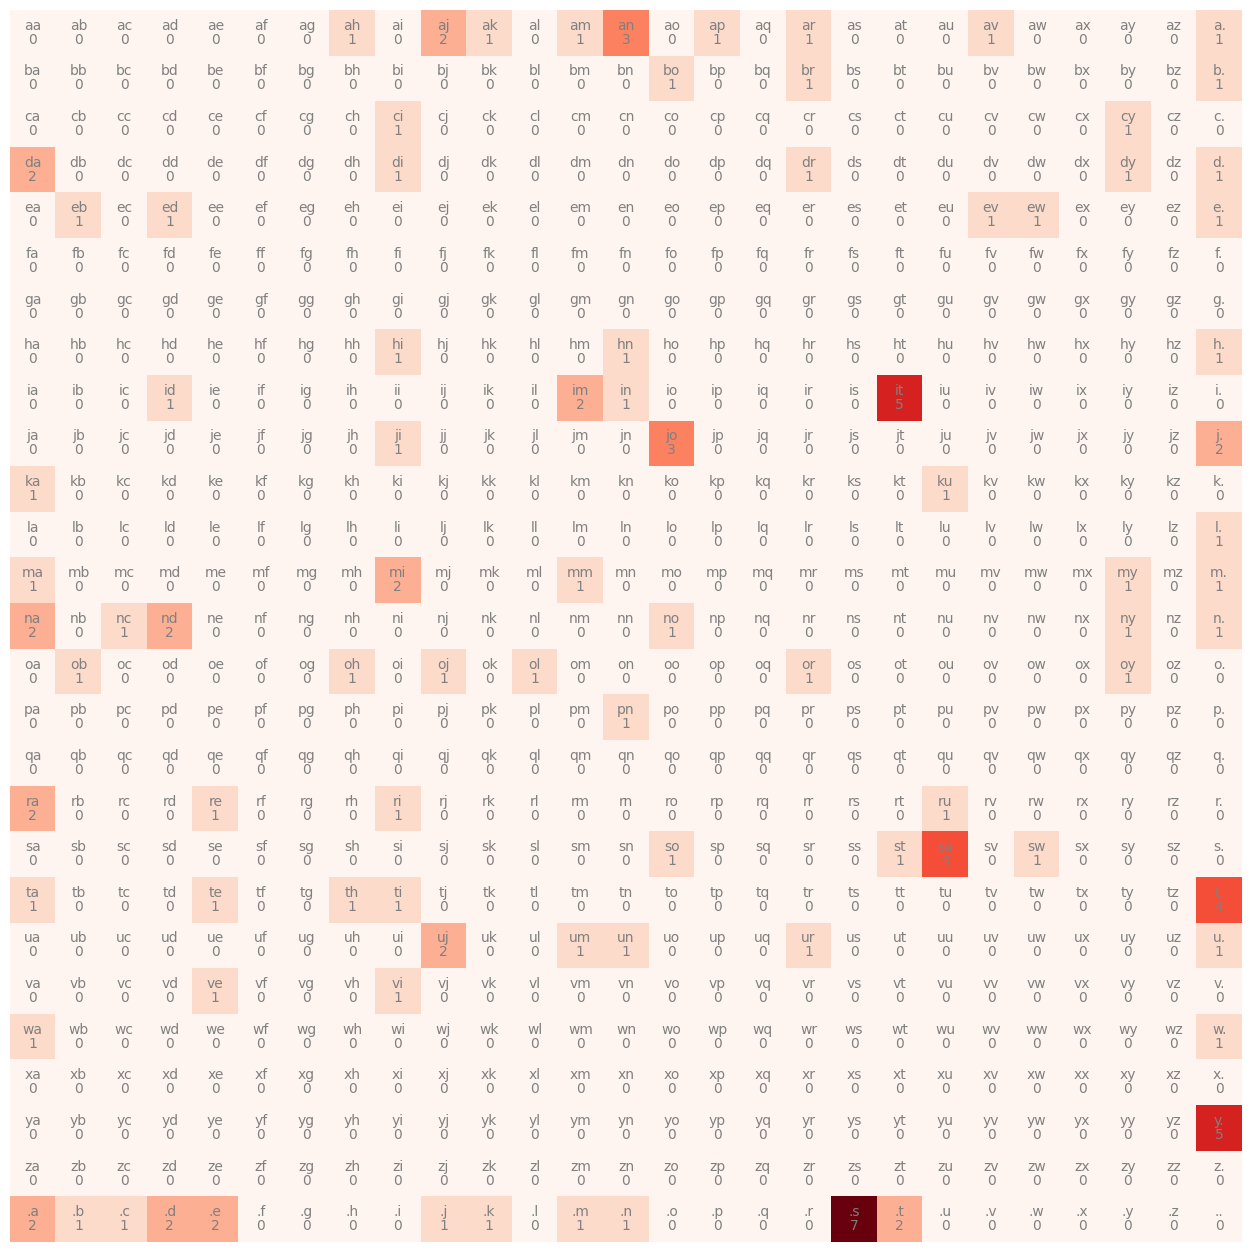

In [161]:
import torch
import numpy as np
import string
import matplotlib.pyplot as plt


chars = list(string.ascii_lowercase)
stoi = {s:i for i,s in enumerate(chars)}
stoi['.'] = 26
itos = {i:s for s,i in stoi.items()}

N = torch.zeros((27,27) , dtype = torch.int32)
words = ['sumit','sorit','swapna','suraj','sujit', 'sujoy', 'manoj', 'amit',
         'kajol', 'steve', 'andrew','bob', 'cindy', 'ebrahim', 'daku', 'johny',
         'timmy', 'david', 'tarun', 'nancy', 'edith']
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1,ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    N[ix1,ix2] += 1

plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Reds')

for i in range(27):
  for j in range(27):
    chstr = itos[i] + itos [j]
    plt.text(j, i, chstr, ha="center", va="bottom", color="gray")
    plt.text(j, i, N[i,j].item(), ha="center", va="top", color="gray")
plt.axis('off')